# A-Star Search Algorithm

This notebook complements the walkthrough article [here](https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb) on the A-Star search algorithm. Throughout the notebook, we ask to you finish sections on your own and answer questions.

## [Question - Describe A*]
Describe A* search in your own words.

The A* algorithm combines the advantages of Dijkstra's algorithm and Greedy search to be used as a best-first searching method for finding the shortest path in a network or graph. The algorithm's cost function is defined as f = g + h, where g is what it costs from the start node to the current node and h is the heuristic anticipation to the destination.

## [Question - Describe h and g]
In A* search, describe the two key elements of *f(n)* (namely *h(n)* and *g(n)*). What do they represent in the algorithm and how do they differ?

h(n) and g(n) are the main components of the cost function in the A* search. The anticipated cost from node n to the goal node is represented by the heuristic function h(n). The algorithm tends to give priority to nodes with lower h(n) values by relying on an optimistic projection of the remaining cost to achieve the goal. The path's real cost from the start node to node n is represented by g(n), which also maintains track of the total cost carried out so far.

The main difference between h(n) and g(n) is in their goals and the data they provide to the algorithm. h(n) offers a heuristic estimate to help direct the search in the right direction while g(n) is used to evaluate the actual cost paid from the start node to the current node.

## [Activity - run Node]
Examine and run the below code.

In [6]:

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position
    



## [Question - Explain 'Node']
In your own words, describe what the purpose of the *Node* class is. Why do we have to initialize a parent and a position?

The Node class is built for A* Pathfinding and represents a grid square. It holds a parent node for path tracing and a grid position. Cost variables 'g', 'h', and 'f' are initialized to zero. 'g' is the actual cost from the start, 'h' is the heuristic to the goal, and 'f' is usually 'g + h'. The class includes an __init__ method for initialization and an __eq__ method to compare node positions.

## [Activity - Run astar() ]

In [7]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if child in closed_list:
              continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


## [Question - Explain maze]
What type of input should value of *maze* be?


The maze variable is expected to be a list (or array) where each element represents a square on the grid. A value of 0 would indicate an open or walkable square.
A value 1 would indicate an obstacle, wall, or non-walkable square.

## [Question - Build Main]
Please use the above code that uses the astar() function to define a path from the beginning to the end of a maze. You can choose how the maze looks and where the start and end are.

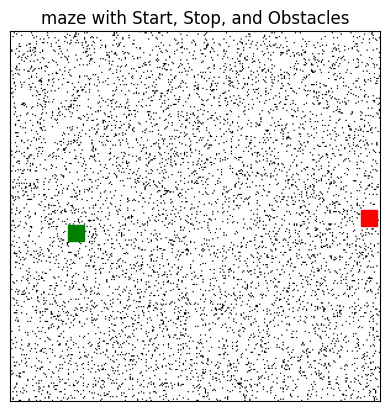

In [177]:
import random
import matplotlib.pyplot as plt
import numpy as np

GRID_SIZE = 300  # Define the dimensions of the grid
maze = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomize the start and stop nodes
start = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
stop = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))

# Ensure that the start and stop nodes are not the same
while start == stop:
    stop = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))

# Generate Obstacle Count
# The number of obstacles is a random integer between 5% to 10% of the total grid squares.
num_obstacles = random.randint(GRID_SIZE * GRID_SIZE // 20, GRID_SIZE * GRID_SIZE // 10)


# Populate grid with obstacles represented by 1
for _ in range(num_obstacles):
    obstacle = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
    # Ensure obstacle does not overlap with start or stop nodes
    while obstacle == start or obstacle == stop:
        obstacle = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
    maze[obstacle] = 1

maze_1 = maze.copy()
# Draw the grid
plt.imshow(maze, cmap='binary')
plt.title('maze with Start, Stop, and Obstacles')
# Draw the start and stop nodes as red and green squares respectively
plt.plot(start[1], start[0], 'rs', markersize=12)
plt.plot(stop[1], stop[0], 'gs', markersize=12)
plt.xticks([])  # remove x-axis ticks and labels
plt.yticks([])  # remove y-axis ticks and labels
plt.show()

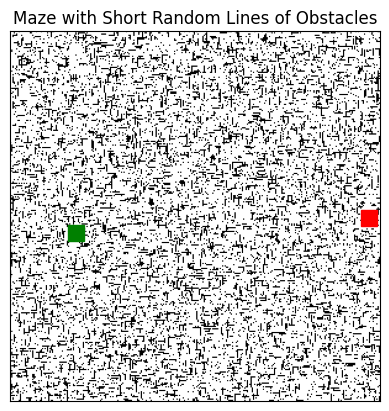

In [178]:
maze = maze_1.copy()
# Add random short lines of obstacles to the maze
num_short_lines = random.randint(GRID_SIZE * GRID_SIZE // 30, GRID_SIZE * GRID_SIZE // 20)  # Number of short lines to add

for _ in range(num_short_lines):
    # Randomly choose a starting point for the short line
    line_start = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
    
    # Randomly determine the length and orientation (horizontal or vertical) of the line
    line_length = np.random.randint(2, 7)  # Length between 2 and 6
    orientation = np.random.choice(['horizontal', 'vertical'])
    
    # Generate the coordinates for the short line of obstacles
    line_coordinates = []
    for i in range(line_length):
        if orientation == 'horizontal':
            coord = (line_start[0], (line_start[1] + i) % GRID_SIZE)
        else:
            coord = ((line_start[0] + i) % GRID_SIZE, line_start[1])
        
        # Make sure the obstacle does not overlap with start, stop nodes, or existing obstacles
        if coord != start and coord != stop and maze[coord] == 0:
            line_coordinates.append(coord)
    
    # Place the short line of obstacles on the maze
    for coord in line_coordinates:
        maze[coord] = 1

# Draw the modified grid with the short lines of obstacles
plt.imshow(maze, cmap='binary')
plt.title('Maze with Short Random Lines of Obstacles')
# Draw the start and stop nodes as red and green squares respectively
plt.plot(start[1], start[0], 'rs', markersize=12)
plt.plot(stop[1], stop[0], 'gs', markersize=12)
plt.xticks([])  # Remove x-axis ticks and labels
plt.yticks([])  # Remove y-axis ticks and labels
plt.show()
# reset the plot settings
plt.rcParams.update(plt.rcParamsDefault)




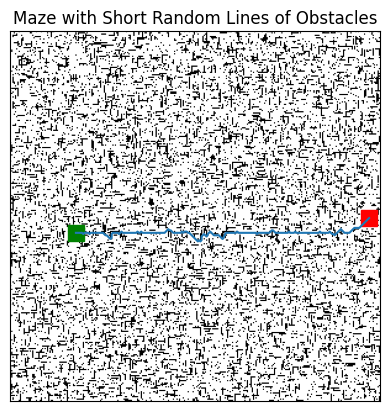

In [179]:
# Find the shortest path
path = astar(maze, start, stop)

# Draw the grid
plt.title('Maze with Short Random Lines of Obstacles')
plt.imshow(maze, cmap='binary')
plt.xticks([])  # Remove x-axis ticks and labels
plt.yticks([])  # Remove y-axis ticks and labels
# Draw the start and stop nodes as red and green squares respectively
plt.plot(start[1], start[0], 'rs', markersize=12)
plt.plot(stop[1], stop[0], 'gs', markersize=12)
# Draw the shortest path as a sequence of blue squares
plt.plot([v[1] for v in path], [v[0] for v in path])
plt.show()


## [Question - Impossible Maze]
Now create a maze that the algorithm cannot solve. What is the output of the algorithm?

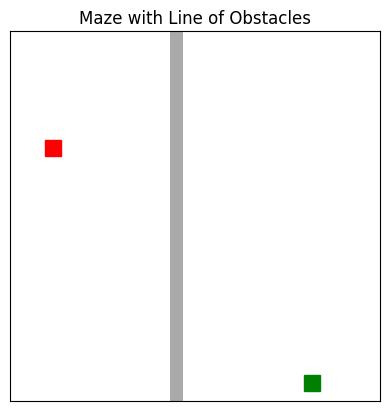

In [60]:
# Initialize a new grid with the same dimensions
maze = np.zeros((GRID_SIZE, GRID_SIZE))

# Place the previously randomized start and stop nodes
maze[start] = 2  # Start node
maze[stop] = 3  # Stop node

# Create a line of obstacles between start and stop
# For simplicity, a vertical line of obstacles will be created at the midpoint between start and stop
midpoint_x = (start[1] + stop[1]) // 2

for y in range(GRID_SIZE):
    obstacle = (y, midpoint_x)
    # Ensure the obstacle line does not overlap with start or stop nodes
    if obstacle != start and obstacle != stop:
        maze[obstacle] = 1

# Draw the modified grid
plt.imshow(maze, cmap='binary')
plt.title('Maze with Line of Obstacles')
# Draw the start and stop nodes as red and green squares respectively
plt.plot(start[1], start[0], 'rs', markersize=12)
plt.plot(stop[1], stop[0], 'gs', markersize=12)
plt.xticks([])  # Remove x-axis ticks and labels
plt.yticks([])  # Remove y-axis ticks and labels
plt.show()

In [61]:
# Find the shortest path
path = astar(maze, start, stop)

# Draw the grid
plt.imshow(maze, cmap='binary')
# Draw the start and stop nodes as red and green squares respectively
plt.plot(start[1], start[0], 'rs', markersize=12)
plt.plot(stop[1], stop[0], 'gs', markersize=12)
# Draw the shortest path as a sequence of blue squares
plt.plot([v[1] for v in path], [v[0] for v in path])

KeyboardInterrupt: 

It just goes into an infinite loop